In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\news\\news.csv",encoding='utf-8')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
import spacy
from bs4 import BeautifulSoup
import re
import textblob

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',"won't": "would not"}

In [7]:
#convert shortcuts to full words-
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [8]:
import unicodedata

In [9]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [11]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [12]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].apply(lambda x: cont_to_exp(x))
    #contraction to expansion
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))
    #removing emails
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))
    # removing urls
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'\brt\b', '', x).strip())
    # remove rt
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'[^\w ]+', "", x))
    #removing special characters and punctuations
    df[content_field] = df[content_field].apply(lambda x: ' '.join(x.split()))
    #remove multiple spaces
    df[content_field] = df[content_field].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())
    #removing HTML tags
    df[content_field] = df[content_field].apply(lambda x: remove_accented_chars(x))
    #remove accented characters
    df[content_field] = df[content_field].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))
    #remove stopwords
    df[content_field] = df[content_field].apply(lambda x: make_to_base(x))
    #convert into base form of word
    return df

In [13]:
standardize_text(df,"text")

,title,text,label
0,You Can Smell Hillary’s Fear,Daniel Greenfield Shillman Journalism Fellow F...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,US Secretary State John F Kerry say Monday sto...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,Kaydee King KaydeeKing November 9 2016 the les...,FAKE
4,The Battle of New York: Why This Primary Matters,its primary day New York frontrunner Hillary C...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,the State Department tell Republican National ...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the p PBS should stand plutocratic Pentagon Po...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,AntiTrump Protesters Are Tools Oligarchy Refor...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...",ADDIS ababa Ethiopia President Obama convene m...,REAL


In [14]:
standardize_text(df,"title")

,title,text,label
0,you can smell Hillarys fear,Daniel Greenfield Shillman Journalism Fellow F...,FAKE
1,watch the exact Moment Paul Ryan commit Politi...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry Paris gesture sympathy,US Secretary State John F Kerry say Monday sto...,REAL
3,Bernie supporter Twitter erupt anger DNC we tr...,Kaydee King KaydeeKing November 9 2016 the les...,FAKE
4,the Battle New York why this primary matter,its primary day New York frontrunner Hillary C...,REAL
...,...,...,...
6330,State Department say find email Clinton IT spe...,the State Department tell Republican National ...,REAL
6331,the p PBS should stand plutocratic Pentagon,the p PBS should stand plutocratic Pentagon Po...,FAKE
6332,AntiTrump Protesters Are Tools Oligarchy Infor...,AntiTrump Protesters Are Tools Oligarchy Refor...,FAKE
6333,in Ethiopia Obama seek progress peace security...,ADDIS ababa Ethiopia President Obama convene m...,REAL


In [15]:
df['text'] = df['text'].apply(lambda x: str(x).lower())

In [16]:
df['title'] = df['title'].apply(lambda x: str(x).lower())

In [17]:
df

,title,text,label
0,you can smell hillarys fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch the exact moment paul ryan commit politi...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry paris gesture sympathy,us secretary state john f kerry say monday sto...,REAL
3,bernie supporter twitter erupt anger dnc we tr...,kaydee king kaydeeking november 9 2016 the les...,FAKE
4,the battle new york why this primary matter,its primary day new york frontrunner hillary c...,REAL
...,...,...,...
6330,state department say find email clinton it spe...,the state department tell republican national ...,REAL
6331,the p pbs should stand plutocratic pentagon,the p pbs should stand plutocratic pentagon po...,FAKE
6332,antitrump protesters are tools oligarchy infor...,antitrump protesters are tools oligarchy refor...,FAKE
6333,in ethiopia obama seek progress peace security...,addis ababa ethiopia president obama convene m...,REAL


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(ngram_range=(1, 3))

In [29]:
corpus=[]
for i in range(0, len(df)):
    message = df['text'][i]
    message = message.split()
    message = ' '.join(message)
    corpus.append(message)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [38]:
y = df["label"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_validate

In [41]:
# build the lightgbm model
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train, y_train)

LGBMClassifier()

model_name : LGBMClassifier()
[[882  61]
 [ 83 875]]
accuracy:  0.9242503945291951
precision:  0.9348290598290598
recall:  0.9133611691022965
AUC_score 0.92433700024574
cross val score for accuracy:  0.938121546961326
cross val score for precision:  0.9428469338985387
cross val score for recall:  0.9331404158076454
difference between model scores and model_cross validation scores below:--   LGBMClassifier()
difference in accuracy:  -0.013871152432130884
difference in precision:  -0.008017874069478848
difference in recall:  -0.01977924670534892






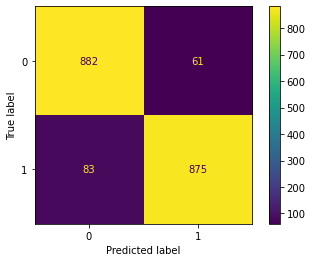

In [44]:
preds = lgbc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix,precision_score,recall_score
accu= accuracy_score(y_test,preds)
precision=precision_score(y_test,preds)
recall=recall_score(y_test,preds)
print('model_name :',lgbc)
print(confusion_matrix(y_test,preds))
print('accuracy: ',accu)
print('precision: ',precision)
print('recall: ',recall)
plot_confusion_matrix(lgbc,X_test,y_test)
auc_score =roc_auc_score(y_test,preds)
print('AUC_score',auc_score)
print('cross val score for accuracy: ',cross_val_score(lgbc,X,y,cv=5,scoring='accuracy').mean())
print('cross val score for precision: ',cross_val_score(lgbc,X,y,cv=5,scoring='precision').mean())
print('cross val score for recall: ',cross_val_score(lgbc,X,y,cv=5,scoring='recall').mean())
print('difference between model scores and model_cross validation scores below:--  ',lgbc)
print('difference in accuracy: ',(accu-cross_val_score(lgbc,X,y,cv=5,scoring='accuracy').mean()))
print('difference in precision: ',(precision-cross_val_score(lgbc,X,y,cv=5,scoring='precision').mean()))
print('difference in recall: ',(recall-cross_val_score(lgbc,X,y,cv=5,scoring='recall').mean()))
print('\n')
print('\n')

##  Randomized search CV-

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
lgpr1 = {'n_estimators':[200,300,],'reg_alpha':[0,0.5,1,1.2],'reg_lambda':[1.2,0,1,0.5] ,
       'learning_rate':[0.1,0.001,0.2,0.3,0.5],'n_jobs':[1],'max_depth':[6,7,8,10,9]}

In [50]:
rl = RandomizedSearchCV(lgbc,param_distributions=lgpr1,cv=5)
rl.fit(X_train,y_train)
y_pred = rl.predict(X_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(rl)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(rl.best_params_)
print('\n')
print('\n')

ACCURACY_SCORE
0.9258285113098369
classification_report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       943
           1       0.94      0.91      0.93       958

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901

confusion_matrix
[[887  56]
 [ 85 873]]
precision_score: 0.9397201291711518
recall_score: 0.9112734864300627
RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.001, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [6, 7, 8, 10, 9],
                                        'n_estimators': [200, 300],
                                        'n_jobs': [1],
                                        'reg_alpha': [0, 0.5, 1, 1.2],
                                        'reg_l

## Saving the model-

In [54]:
import joblib

In [55]:
joblib.dump(lgbc,'light_classifier_nlp_model.obj')

['light_classifier_nlp_model.obj']